In [1]:
INPUT_DIR = "../input/ch_train_set"

cd(INPUT_DIR)

In [2]:
using Glob: glob

labels = glob("*")

labels[1:5]

5-element Array{String,1}:
 "a440"
 "a447"
 "a448"
 "a44a"
 "a451"

In [3]:
# Only bother with classes that have at least 150 images.
labels = [
    label
    for label in glob("*")
    if length(glob(label * "/*")) >= 150
]

15-element Array{String,1}:
 "a440"
 "a447"
 "a448"
 "a453"
 "a46a"
 "a46c"
 "a4a3"
 "a4a7"
 "a4bd"
 "a4eb"
 "a548"
 "a5ce"
 "aaf7"
 "b0a8"
 "b6c0"

In [4]:
using Images

# Convert an example into a 
function to_example(fname::String)
    float.(Gray.(load(fname)))
end


to_example (generic function with 1 method)

In [5]:
to_example("a440/a440-chuxi_001.png")

65×79 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

In [6]:
y_raw = Symbol[]
pngs = []

for label in labels
    
    # Just take the first 150 images
    fnames = glob(label * "/*png")[1:150]
        
    for fname in fnames
        push!(pngs, to_example(fname))
        push!(y_raw, Symbol(label))
    end
end

println(summary(y_raw))
summary(pngs)

2250-element Array{Symbol,1}


"2250-element Array{Any,1}"

In [7]:
# Want: 
# Within X_train, the dimensions are going to be 
# H - height of image
# W - width of image
# C - number of channels (only 1 for black and white)
# I - the ith image, out of a total of B in the batch.

# (H x W x C x I)
X_raw = cat(pngs..., dims=4)

65×79×1×2250 Array{Float64,4}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.

In [8]:
summary(y_raw)

"2250-element Array{Symbol,1}"

In [9]:
using JLD
using Statistics: mean, std
using Plots

In [10]:

println(summary(X_raw))
println(summary(y_raw));

65×79×1×2250 Array{Float64,4}
2250-element Array{Symbol,1}


In [11]:
mean(X_raw, dims=(3,4))
std(X_raw, dims=(3,4))

65×79×1×1 Array{Float64,4}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  

In [12]:
X_means = mean(X_raw, dims=(3,4))

X_means[X_means .>  0.5]

21-element Array{Float64,1}:
 0.5044444444444445
 0.5071111111111112
 0.5013333333333334
 0.5084444444444445
 0.5137777777777778
 0.5115555555555555
 0.512             
 0.508             
 0.5093333333333333
 0.5115555555555555
 0.508             
 0.5048888888888889
 0.5084444444444445
 0.516888888888889 
 0.524             
 0.520888888888889 
 0.5111111111111112
 0.504             
 0.5017777777777778
 0.5048888888888889
 0.5031111111111112

In [13]:
X_stdevs = std(X_raw, dims=(3,4))

X_stdevs[X_stdevs .>  0.5]

24-element Array{Float64,1}:
 0.5000985032164356
 0.500111148161871 
 0.50009139029413  
 0.5000605664616427
 0.500109369985736 
 0.5001093699857381
 0.500039818581477 
 0.5000155128268793
 0.5000471298374749
 0.50002401009493  
 0.5000471298374756
 0.5000872410427225
 0.5000398185814767
 0.500095144349063 
 0.500066691861661 
 0.5000398185814744
 0.500107986955492 
 0.5001093699857356
 0.5001014669042027
 0.500047129837475 
 0.5000872410427227
 0.5001014669042009
 0.5000724220066745
 0.5000471298374745

In [14]:
# Normalize images.

epsilon = 1e-15 

X_raw_normed = (X_raw .- mean(X_raw, dims=(3,4))) ./ (std(X_raw, dims=(3,4)) .+ epsilon)



65×79×1×2250 Array{Float64,4}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.

In [15]:
X_means = mean(X_raw_normed, dims=(3,4))

X_means[-0.01 .< X_means .<  0.01]

5135-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [16]:
X_stdevs = std(X_raw_normed, dims=(3,4))

X_stdevs[.99 .< X_stdevs .< 1.1]

3948-element Array{Float64,1}:
 0.9999999999999459
 0.9999999999999549
 0.999999999999941 
 0.9999999999999216
 1.000000000000006 
 0.9999999999999686
 0.9999999999999212
 0.9999999999999366
 0.9999999999999283
 0.9999999999999719
 0.9999999999999185
 0.9999999999999687
 0.9999999999999851
 ⋮                 
 1.0000000000000142
 0.9999999999999396
 0.9999999999999396
 0.9999999999999396
 0.9999999999999624
 0.9999999999999121
 0.9999999999999108
 0.9999999999999486
 0.9999999999999081
 0.9999999999999071
 0.9999999999999103
 0.999999999999914 

In [17]:
using MLDataUtils: shuffleobs, splitobs

In [18]:
Xs, ys = shuffleobs((X_raw_normed, y_raw))

(X_train, y_train), (X_test, y_test) = splitobs((Xs, ys); at=2/3)
    
@show size(X_train)
@show size(y_train)
@show size(X_test)
@show size(y_test);

size(X_train) = (65, 79, 1, 1500)
size(y_train) = (1500,)
size(X_test) = (65, 79, 1, 750)
size(y_test) = (750,)


In [19]:
using Pkg
"CuArrays" in keys(Pkg.installed()) && using CuArrays

loaded


In [20]:
using Flux
using Flux: onehotbatch, crossentropy, data, onecold



In [21]:
y_train_onehot = onehotbatch(y_train, unique(y_train))
y_test_onehot = onehotbatch(y_test, unique(y_test))

println(summary(y_train_onehot))
println(summary(y_test_onehot));

15×1500 Flux.OneHotMatrix{Array{Flux.OneHotVector,1}}
15×750 Flux.OneHotMatrix{Array{Flux.OneHotVector,1}}


In [22]:
# N features
# M examples total
N, M = size(X_train)

(65, 79, 1, 1500)

In [23]:
# SKIPPING 

# collect(partition(1:15, 5))

In [24]:
model = Chain(
   Conv((2,2), 1=>16, relu),
   x -> maxpool(x, (2,2)),
    
   Conv((2,2), 16=>8, relu),
   x -> maxpool(x, (2,2)),
    
   x -> reshape(x, :, size(x, 4)),
    
   Dense(2280, 15), 
  
   softmax
) |> gpu

Chain(Conv((2, 2), 1=>16, NNlib.relu), getfield(Main, Symbol("##7#10"))(), Conv((2, 2), 16=>8, NNlib.relu), getfield(Main, Symbol("##8#11"))(), getfield(Main, Symbol("##9#12"))(), Dense(2280, 15), NNlib.softmax)

In [25]:
# @show summary(model(train[1][1]))
# @show summary(train[1][2])

In [26]:
loss(x, y) = crossentropy(model(x), y)

loss (generic function with 1 method)

In [27]:
# sanity check, make sure it works
#loss(normalized_images, y_onehot)

In [28]:
accuracy(x, y) = mean(onecold(model(x)) .== onecold(y))

opt = ADAM(params(model)) |> gpu

#43 (generic function with 1 method)

In [29]:
# Why is this necessary?  Not sure.
test_batch = X_test[:, :, :, 1:end]

# ŷ_test_proba = model(test_batch)

65×79×1×750 Array{Float64,4}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [30]:
#accuracy(x, y) = mean(onecold(model(x)) .== onecold(y))
test_accuracies = Float64[]

0-element Array{Float64,1}

In [31]:
# Flux won't take a view, which is what X_train is.
X_train_copy = copy(X_train) |> gpu
y_train_onehot = y_train_onehot |> gpu

15×1500 Flux.OneHotMatrix{CuArray{Flux.OneHotVector,1}}:
  true  false  false  false  false  …  false   true  false  false  false
 false   true  false   true  false     false  false  false  false  false
 false  false   true  false  false     false  false  false  false   true
 false  false  false  false   true     false  false  false   true  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false  …  false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false      true  false  false  false  false
 false  false  false  false  false     false  false   true  false  false
 false  false  false  false  false  …  false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  

In [32]:
losses = []
accuracies = []

0-element Array{Any,1}

accuracies = Any[0.072]
accuracies = Any[0.072, 0.112667]
accuracies = Any[0.072, 0.112667, 0.138]
accuracies = Any[0.072, 0.112667, 0.138, 0.166]
accuracies = Any[0.072, 0.112667, 0.138, 0.166, 0.184]
accuracies = Any[0.072, 0.112667, 0.138, 0.166, 0.184, 0.18]
accuracies = Any[0.072, 0.112667, 0.138, 0.166, 0.184, 0.18, 0.175333]
accuracies = Any[0.072, 0.112667, 0.138, 0.166, 0.184, 0.18, 0.175333, 0.178667]
accuracies = Any[0.072, 0.112667, 0.138, 0.166, 0.184, 0.18, 0.175333, 0.178667, 0.184667]
accuracies = Any[0.072, 0.112667, 0.138, 0.166, 0.184, 0.18, 0.175333, 0.178667, 0.184667, 0.194]
accuracies = Any[0.072, 0.112667, 0.138, 0.166, 0.184, 0.18, 0.175333, 0.178667, 0.184667, 0.194]


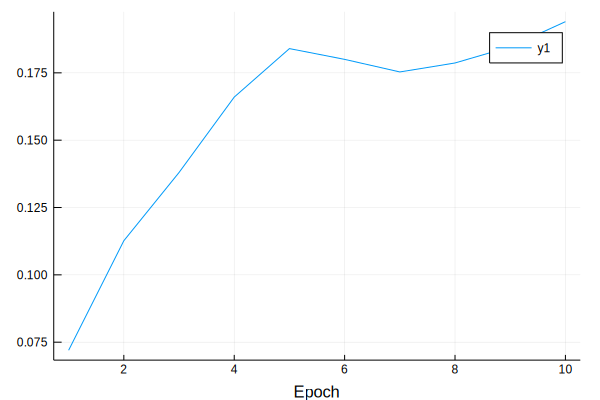

In [33]:


for i in 1:10
    Flux.train!(loss, [(X_train_copy, y_train_onehot)], opt)

    push!(losses, data(loss(X_train_copy, y_train_onehot)))
    push!(accuracies, accuracy(X_train_copy, y_train_onehot))
    
    @show accuracies
    
#    test_accuracy = accuracy(test_batch, y_test)

#    push!(test_accuracies, test_accuracy)
end    
    
@show accuracies
plot(accuracies, xlabel="Epoch")